In [50]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
#Growth Chart Info on Age, DBH and Height
rubber_stats = [[1,2.273,1.917],[2,2.345,1.598],[3,2.394,1.421],[4,2.430,1.302],[5,2.460,1.215],[6,2.485,1.146],[7,0.933,0.617],
                [8,0.873,0.577],[9,0.823,0.544],[10,0.780,0.516],[11,0.743,0.492],[12,0.710,0.470],[13,0.682,0.451],
                [14,0.656,0.434],[15,0.633,0.419],[16,0.613,0.406],[17,0.594,0.393],[18,0.576,0.382],[19,0.560,0.371],
                [20,0.546,0.361],[21,0.532,0.352],[22,0.519,0.344],[23,0.507,0.336],[24,0.496,0.329]]

In [3]:
# Creating a DataFrame for the Growth chart attributes
# Here: Growth rate of DBH (cm year-1), TH (m year-1) and MH (m year-1) is presented
df = pd.DataFrame(rubber_stats,
                  columns=['Age', 'DBH', 'Height'])

In [4]:
df

,Age,DBH,Height
0,1,2.273,1.917
1,2,2.345,1.598
2,3,2.394,1.421
3,4,2.430,1.302
4,5,2.460,1.215
5,6,2.485,1.146
6,7,0.933,0.617
7,8,0.873,0.577
8,9,0.823,0.544
9,10,0.780,0.516


In [112]:
#Obtaining the cumulatives for DBH and Height parameters - since the value is per year
df = df.assign(DBH_new=df.DBH.cumsum())
df = df.assign(Height_new=df.Height.cumsum())
df

,Age,DBH,Height,DBH_new,Height_new
0,1,2.273,1.917,2.273,1.917
1,2,2.345,1.598,4.618,3.515
2,3,2.394,1.421,7.012,4.936
3,4,2.430,1.302,9.442,6.238
4,5,2.460,1.215,11.902,7.453
5,6,2.485,1.146,14.387,8.599
6,7,0.933,0.617,15.320,9.216
7,8,0.873,0.577,16.193,9.793
8,9,0.823,0.544,17.016,10.337
9,10,0.780,0.516,17.796,10.853


In [23]:
DBH = df["DBH"]
DBH[0]

2.273

In [30]:
#Above-ground Biomass estimation equation for Rubber trees:
#log10 W = 0.18 + 0.007 log10 D + 0.705 log10 HT+ 0.002 log10 AG
#where W – biomass, D – diameter, HT – height and AG - age of rubber trees 
#And W is in g/tree, D is in mm, HT is in cm
#------------------------------------------------------------------------------------------------------------------
#Log10_AGB[i] = 0.18 + (0.007*math.log(DBH[i],10)) + (0.705*math.log(Height[i],10)) + (0.002*math.log(Age[i],10))
#AGB[i] = 10**(Log10_AGB[i])

In [113]:
#Converting DBH in cm to mm
#Converting Height in m to cm
df["DBH_new_in_mm"]=10*df["DBH_new"]
df["Height_new_in_cm"] = 100*df["Height_new"]
df

,Age,DBH,Height,DBH_new,Height_new,DBH_new_in_mm,Height_new_in_cm
0,1,2.273,1.917,2.273,1.917,22.73,191.7
1,2,2.345,1.598,4.618,3.515,46.18,351.5
2,3,2.394,1.421,7.012,4.936,70.12,493.6
3,4,2.430,1.302,9.442,6.238,94.42,623.8
4,5,2.460,1.215,11.902,7.453,119.02,745.3
5,6,2.485,1.146,14.387,8.599,143.87,859.9
6,7,0.933,0.617,15.320,9.216,153.20,921.6
7,8,0.873,0.577,16.193,9.793,161.93,979.3
8,9,0.823,0.544,17.016,10.337,170.16,1033.7
9,10,0.780,0.516,17.796,10.853,177.96,1085.3


In [114]:
#AGB estimation for 1 Rubber tree
def calculate_AGB(row):
    return (10**(0.18 + (0.007*math.log(row['DBH_new_in_mm'],10)) + (0.705*math.log(row['Height_new_in_cm'],10)) + (0.002*math.log(row['Age'],10))))

#AGB_lst = df.apply(calculate_AGB, axis=1)

#AGB estimation for n Rubber trees
def calculate_totalAGB(n):
    return n*df.apply(calculate_AGB, axis=1)

#AGB Estimation - Dataframe
AGBtot_lst = calculate_totalAGB(50)
AGBtot_lst
AGB_df = pd.DataFrame(AGBtot_lst, columns=["Total AGB"])
#AGB_df = AGB_lst.to_frame(name="AGB")
AGB_df

,Total AGB
0,3145.681802
1,4854.009243
2,6189.771566
3,7319.923772
4,8315.545121
5,9213.357063
6,9681.874533
7,10112.000501
8,10510.965864
9,10883.908254


In [115]:
#Carbon Sequestration estimation for n Rubber trees
def calculate_SEQ(n,CF,row):
    return n*CF*row['Total AGB']

SEQ_lst = calculate_SEQ(50,0.5,AGB_df)
SEQ_df = SEQ_lst.to_frame(name="Total Carbon Sequestration")
SEQ_df

,Total Carbon Sequestration
0,78642.045057
1,121350.231087
2,154744.289159
3,182998.094300
4,207888.628029
5,230333.926580
6,242046.863337
7,252800.012521
8,262774.146609
9,272097.706352


In [83]:
isinstance(SEQ_lst, pd.core.series.Series)

True

,Age,Total AGB
0,1,3145.681802
1,2,4854.009243
2,3,6189.771566
3,4,7319.923772
4,5,8315.545121
5,6,9213.357063
6,7,9681.874533
7,8,10112.000501
8,9,10510.965864
9,10,10883.908254


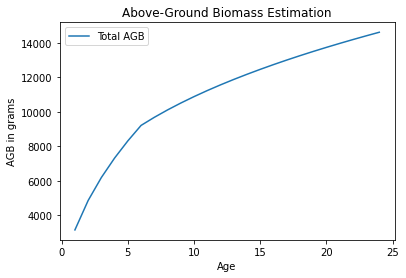

In [117]:
#Age vs Total AGB Estimation
finaldf_AGB = [df["Age"], AGB_df]
  
result_AGB = pd.concat(finaldf_AGB, axis=1, join='inner')
display(result_AGB)

result_AGB.plot(x ='Age', y='Total AGB', kind = 'line')
plt.title('Above-Ground Biomass Estimation')
plt.xlabel('Age')
plt.ylabel('AGB in grams')
plt.show()

,Age,Total Carbon Sequestration
0,1,78642.045057
1,2,121350.231087
2,3,154744.289159
3,4,182998.094300
4,5,207888.628029
5,6,230333.926580
6,7,242046.863337
7,8,252800.012521
8,9,262774.146609
9,10,272097.706352


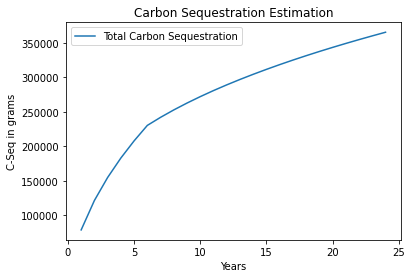

In [118]:
#Age vs Total C seq Estimation
finaldf_SEQ = [df["Age"], SEQ_df]
  
result_SEQ = pd.concat(finaldf_SEQ, axis=1, join='inner')
display(result_SEQ)

result_SEQ.plot(x ='Age', y='Total Carbon Sequestration', kind = 'line')
plt.title('Carbon Sequestration Estimation')
plt.xlabel('Years')
plt.ylabel('C-Seq in grams')
plt.show()